In [1]:
import pyaudio
import sys
import wave
import pickle
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [2]:
form = 8
channels = 2
rate = 44100
CHUNK = 2**11
hop_length = CHUNK//2

In [6]:
song = []

p=pyaudio.PyAudio()
stream=p.open(format=form,channels=channels,rate=rate,
              frames_per_buffer=CHUNK,output=True)
file = wave.open("../Music/beethovenwav.wav", "rb")

data = file.readframes(CHUNK)
while data != "":
    stream.write(data)
    song.append(np.frombuffer(data, dtype=np.int8))
    data = file.readframes(CHUNK)
    
stream.stop_stream()
stream.close() 
p.terminate()

KeyboardInterrupt: 

In [3]:
lib_song, sr = librosa.load("../Music/beethovenwav.wav")

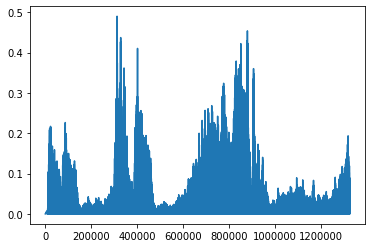

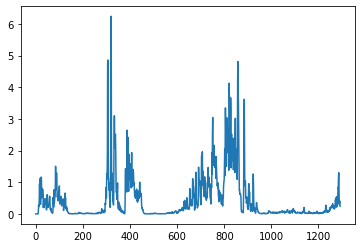

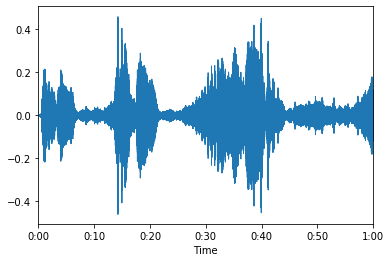

In [51]:
plt.plot(abs(lib_song))
plt.show()
plt.plot(S_DB)
plt.show()
librosa.display.waveplot(lib_song, sr=sr)

In [34]:
buffer = []
grads = []
pitches = []
Ds = []

n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=CHUNK, n_mels=n_mels)

num_sample = 0
for i in range(len(lib_song)//CHUNK):
    for sample in [lib_song[CHUNK*i:CHUNK*(i+1)]]:
        #print(len(sample))
        buffer.extend(sample)
        D = np.abs(librosa.stft(sample, n_fft=CHUNK, hop_length=CHUNK+1))**2
        
        Ds.append(D)
        """S = mel.dot(D)
        S_DB = librosa.power_to_db(S, ref=np.mean)


        plt.figure(figsize=(10, 6));
        librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
        plt.colorbar(format='%+2.0f dB');"""

    
    

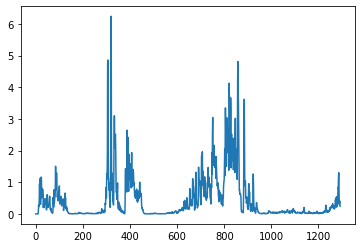

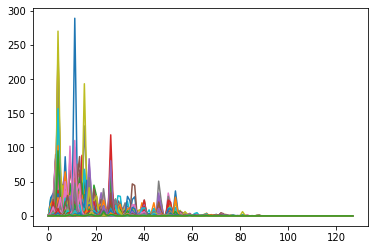

In [49]:
S = librosa.feature.melspectrogram(lib_song, sr=sr, n_fft=CHUNK, hop_length=hop_length, n_mels=n_mels)
S_DB = np.mean(S, axis = 0)
plt.plot(S_DB)
plt.show()
plt.plot(S)
plt.show()

In [37]:
print(np.squeeze(mel.dot(Ds)).shape)

(128, 646)


(128, 646)


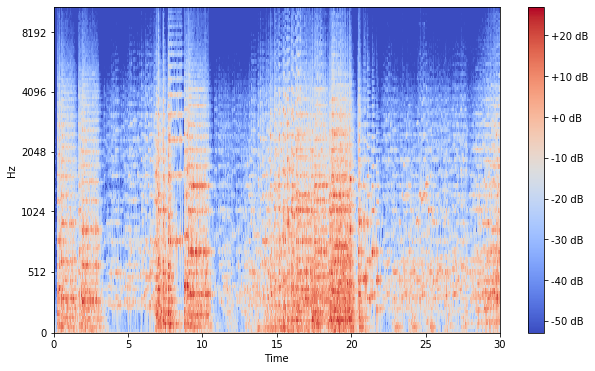

In [39]:
Ss = np.squeeze(mel.dot(Ds))
print(Ss.shape)
S_DB = librosa.power_to_db(Ss, ref=np.mean)


plt.figure(figsize=(10, 6));
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [23]:
print(grads, np.max(abs(grads)), grads.shape)

[      0.               0.               0.         ...  -95082.09216507
 -100524.32900649  -90148.48186639] 532067.947559697 (5630,)


In [24]:
128 * 1025

131200

In [25]:
len(lib_song)

1323672

In [26]:
lib_song.shape

(1323672,)